In [1]:
import osmnx as ox
import igraph as ig
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib as mpl
import random as rd
from IPython.display import clear_output
from shapely.wkt import loads as load_wkt
import matplotlib.cm as cm
import time
ox.config(log_console=True, use_cache=True)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:335: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for polygon in geometry:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\utils_geo.py:426: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for poly in multipoly:


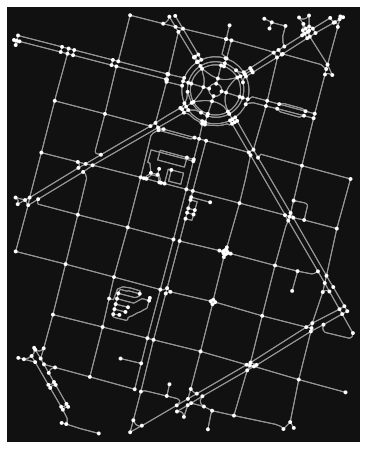

In [2]:
G = ox.graph_from_bbox(-19.9209,-19.9312,-43.9505,-43.9415,network_type='walk')

fig, ax = ox.plot_graph(G)

In [3]:
df = pd.read_excel(r'C:\Users\Vinicius Fernandes\Documents\GitHub\TCC\Testes\Teste Escala Menor\lista_enderecos_escala_menor.xlsx')
df = pd.concat([df[['enderecos']], df['coordenadas'].str.split(', ', expand=True)], axis=1)
df[0] = pd.to_numeric(df[0])
df[1] = pd.to_numeric(df[1])
df

,enderecos,0,1
0,"Avenida Augusto de Lima, 744, Centro",-19.922607,-43.942935
1,"Avenida Olegário Maciel, 1600, Lourdes",-19.927987,-43.947409
2,"Rua Gonçalves Dias, 2001, Lourdes",-19.929672,-43.943978
3,"Rua São Paulo, 1918, Lourdes",-19.930259,-43.943316
4,"Avenida Bias Fortes, 799, Lourdes",-19.926656,-43.942923
5,"Rua dos Timbiras, 2459, Santo Agostinho",-19.925280,-43.946140
6,"AV AUGUSTO DE LIMA, 876, CENTRO",-19.922865,-43.944002
7,"R. Gonçalves Dias, 2700, Santo Agostinho",-19.927839,-43.949675


In [4]:
nodes_araujos = []

for i in range(len(df)):
    coordenada_lat = df.loc[i,0]
    coordenada_long = df.loc[i,1]
    location_point = (coordenada_lat,coordenada_long)
    origin_node = ox.get_nearest_node(G, location_point)
    nodes_araujos.append(origin_node)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)
C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use th

In [5]:
nodes_araujos

[2828780801,
 6918856501,
 8934295040,
 29095398,
 8979229854,
 41416532,
 28800979,
 60649429]

In [6]:
nodes, edges = ox.graph_to_gdfs(G, nodes=True, edges=True)  # Transforms nodes and edges into Geodataframes

nodes['menor_distancia_para_araujo'] = 0
nodes['araujo_mais_proxima'] = 0
route_lengths = []


In [11]:
count = 0
for node in G.nodes:
    start_time = time.time()
    route_length = 48094890489080489
    for araujo in nodes_araujos:
        try:
            new_route_length = nx.shortest_path_length(G, node, araujo, weight='length')
            if new_route_length < route_length:
                route_length = new_route_length
                araujo_proxima = araujo

        except nx.exception.NetworkXNoPath:
            continue
            
    route_lengths.append(route_length)
    nodes['menor_distancia_para_araujo'][node] = route_length
    nodes['araujo_mais_proxima'][node] = araujo_proxima
    count += 1
    if int(count/len(G.nodes)*100)%5 == 0:
        print(int(count/len(G.nodes)*100),'%')
        print("--- %s seconds ---" % (time.time() - start_time))
    

C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_904/1773732520.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['menor_distancia_para_araujo'][node] = route_length
C:\Users\VINICI~1\AppData\Local\Temp/ipykernel_904/1773732520.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nodes['araujo_mais_proxima'][node] = araujo_proxima


0 %
--- 0.01435708999633789 seconds ---
0 %
--- 0.006975889205932617 seconds ---
0 %
--- 0.007973432540893555 seconds ---
5 %
--- 0.0 seconds ---
5 %
--- 0.015634536743164062 seconds ---
5 %
--- 0.0 seconds ---
5 %
--- 0.015623807907104492 seconds ---
10 %
--- 0.0 seconds ---
10 %
--- 0.015635251998901367 seconds ---
10 %
--- 0.0 seconds ---
10 %
--- 0.0 seconds ---
15 %
--- 0.015608072280883789 seconds ---
15 %
--- 0.009307146072387695 seconds ---
15 %
--- 0.01405644416809082 seconds ---
15 %
--- 0.008937597274780273 seconds ---
20 %
--- 0.015615701675415039 seconds ---
20 %
--- 0.0 seconds ---
20 %
--- 0.0 seconds ---
25 %
--- 0.015630722045898438 seconds ---
25 %
--- 0.0 seconds ---
25 %
--- 0.0 seconds ---
30 %
--- 0.0 seconds ---
30 %
--- 0.02100682258605957 seconds ---
30 %
--- 0.005571603775024414 seconds ---
35 %
--- 0.008011579513549805 seconds ---
35 %
--- 0.006958484649658203 seconds ---
35 %
--- 0.007143497467041016 seconds ---
40 %
--- 0.0059816837310791016 seconds ---
40 

In [12]:
nodes.to_excel('aaa.xlsx')

PermissionError: [Errno 13] Permission denied: 'aaa.xlsx'

In [13]:
def get_colors(n, cmap='seismic', start=0., stop=1.):

    colors = [cm.get_cmap(cmap)(x) for x in np.linspace(start, stop, n)]
    colors = [(r, g, b, 1) for r, g, b, _ in colors]
    return colors

def get_node_colors_by_attr(G, attr, cmap='seismic', start=0, stop=1, na_color='none'):

    #num_bins = len(G.nodes())
    num_bins = 10
    
    bin_labels = range(num_bins)
    
    attr_values = pd.Series(nodes[attr].values)  # Cretaes a dataframe ith the attribute of each node
    
    cats = pd.qcut(x=attr_values, q=num_bins, labels=bin_labels)  # Puts the values in bins
    
    colors = get_colors(num_bins, cmap, start, stop)  #List of colors of each bin
    node_colors = [colors[int(cat)] if pd.notnull(cat) else na_color for cat in cats]

    return node_colors

In [14]:
nc = get_node_colors_by_attr(G, attr='menor_distancia_para_araujo')
nc
#ns = [80 if node == target_1 else 20 for node in G.nodes()]


[(1.0, 0.33333333333333337, 0.33333333333333337, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.7725490196078432, 0.7725490196078432, 1.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.0, 0.0, 0.3, 1),
 (1.0, 0.7725490196078432, 0.7725490196078432, 1),
 (1.0, 0.33333333333333337, 0.33333333333333337, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.0, 0.0, 0.3, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.0, 0.0, 0.3, 1),
 (0.7725490196078432, 0.7725490196078432, 1.0, 1),
 (0.0, 0.0, 0.9149019607843136, 1),
 (1.0, 0.33333333333333337, 0.33333333333333337, 1),
 (0.9392156862745098, 0.0, 0.0, 1),
 (0.5, 0.0, 0.0, 1),
 (0.0, 0.0, 0.9149019607843136, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.0, 0.0, 0.9149019607843136, 1),
 (0.3333333333333333, 0.3333333333333333, 1.0, 1),
 (0.0, 0.0, 0.6074509803921568, 1),
 (0.

In [20]:
ns = [0]*len(G.nodes())
k = 0
for node in G.nodes():
    for node_araujo in nodes_araujos:
        #print(node)
        #print(node_araujo)
        if node == node_araujo:
            nc[k] = 'green'
            ns[k] = 80
            break
            #print('chegou aqui')
        else:
            ns[k] = 20
    k += 1

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\matplotlib\cbook\__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


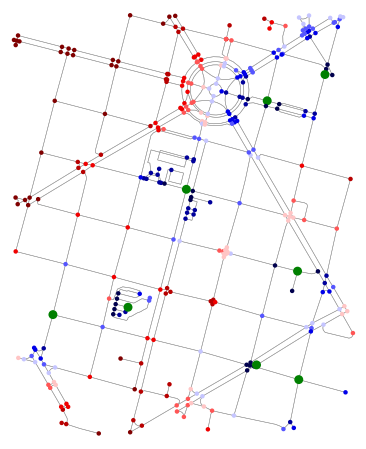

In [21]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)

C:\Users\Vinicius Fernandes\.conda\envs\ox\lib\site-packages\matplotlib\cbook\__init__.py:1061: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x = np.asanyarray(x)


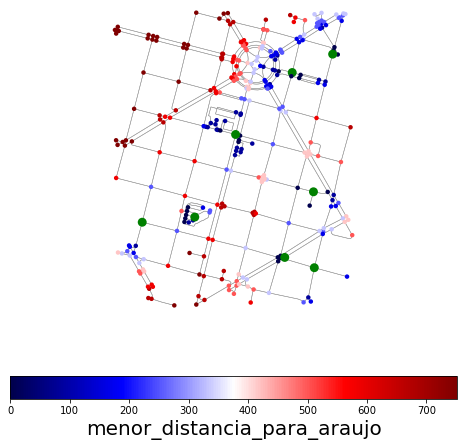

In [22]:
fig, ax = ox.plot_graph(G, node_color=nc, node_size=ns, edge_linewidth=0.5, bgcolor = 'white', show=False)
cmap = plt.cm.get_cmap('seismic')
norm=plt.Normalize(vmin=nodes['menor_distancia_para_araujo'].min(), vmax=nodes['menor_distancia_para_araujo'].max())
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

cb = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax, orientation='horizontal')
cb.set_label('menor_distancia_para_araujo', fontsize = 20)
fig.savefig('demo.png')

In [ ]:
print('nós originais\n', list(G.nodes()))
print('\narestas originais\n', list(G.edges()))

In [ ]:
G_nx = nx.relabel.convert_node_labels_to_integers(G)
print('nós convertidos\n', list(G_nx.nodes()))
print('\narestas convertidas\n', list(G_nx.edges()))

In [ ]:
location_point = (-19.92798671024853, -43.94740898668482)
origin_node = ox.get_nearest_node(G, location_point)
origin_node

In [ ]:
shortest_path = nx.shortest_path(G,origin_node,2828035001)
ox.plot.plot_graph_route(G,shortest_path)

In [ ]:
rota_teste = [28801018, 8269807083]
ox.plot.plot_graph_route(G,rota_teste)

In [ ]:
weight = 'length'
print(list(nx.get_node_attributes(G, 'osmid').values()))
print(list(nx.get_edge_attributes(G, weight).values()))

In [ ]:
print('informações dos nós: ',G.nodes[28801018])
print('informações das arestas: ',G[28801018][8933734968])

In [ ]:
fig, ax = ox.plot_graph(G)

In [ ]:
nc = [0]*31

In [ ]:
for i in range(len(nc)):
    nc[i] = 'w'

In [ ]:
k=0
for node in G.nodes():

    if node == origin_node:

        nc[k] = str('red')
        k += 1
    else:
        nc[k] = str('w')
        k += 1

In [ ]:
G = ox.project_graph(G)
fig, ax = ox.plot_graph(G, node_color=nc)